In [1]:
# import packages
import numpy as np

import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.ticker import LinearLocator
## set default plot size
plt.rcParams["figure.figsize"] = (10, 7)
## set global font size
plt.rcParams.update({'font.size':18})

import astropy.units as u
from astropy import constants as const

# Basic phase mixing plot

The phase mixing solution satisfies this form of the linearized Vlasov equation that ignores the third term:

$$\frac{\partial \delta f}{\partial t} + \vec{v} \cdot \vec{\nabla} \delta f = 0. $$

In my 9/19 notes with Matt, we discussed how the phase mixing solution corresponds to constant velocity trajectories $r = r_0 + vt$.  Furthermore, the (one-dimensional) solution is:

$$ \delta f_k (v, t) = \delta f_k(v, t=0) \, e^{ikvt} $$

This basically says that, for a fixed position $r$, the potential varies more and more rapidly in $v$ space over time. 

For example, assume that $\delta f_k (r, v, t=0) = F_0 \cos(kr)$. Then:

$$ \delta f_k (r, v, t) = F_0 \cos(k(r - vt)). $$

Below, I plot this example distribution's phase space at different times.

In [13]:
def phase_space_fn(r, v, t, F0=1, k=1):
    '''
    Given a phase space coordinate (r, v), plot the function 
    delta f_k (specified above) at time t.
    
    ARGUMENTS
    ---------
    F0: amplitude of the initial perturbation in f_k 
    r: position
    v: velocity
    t: time
    
    '''

    return F0 * np.cos(k * (r - v*t))

Source for 3D surface code: https://matplotlib.org/3.4.3/gallery/mplot3d/surface3d.html#sphx-glr-gallery-mplot3d-surface3d-py

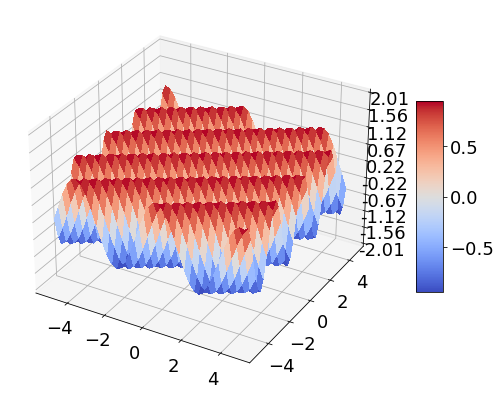

In [34]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
t = 1.6 # snapshot in time
rs = np.arange(-5, 5, 0.25)
vs = np.arange(-5, 5, 0.25)
rs, vs = np.meshgrid(rs, vs)
Z = phase_space_fn(rs, vs, t, k=1.5)

# Plot the surface.
surf = ax.plot_surface(rs, vs, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-2.01, 2.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=7)

plt.show()